In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('HR Employee Attrition.csv')

<h1>단일값 특성 제거</h1>

In [3]:
for col in data.columns:
    if data[col].unique().size == 1:
        data.drop(col, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

<h1> 특성 고유값 확인</h1>

In [8]:
for col in data.columns:
    if data[col].unique().size < 30:
        print(col, data[col].unique())
        print('-------------------------------')

Attrition ['Yes' 'No']
-------------------------------
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-------------------------------
Department ['Sales' 'Research & Development' 'Human Resources']
-------------------------------
DistanceFromHome [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
-------------------------------
Education [2 1 4 3 5]
-------------------------------
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-------------------------------
EnvironmentSatisfaction [2 3 4 1]
-------------------------------
Gender ['Female' 'Male']
-------------------------------
JobInvolvement [3 2 4 1]
-------------------------------
JobLevel [2 1 3 4 5]
-------------------------------
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resou

<h1>NumCompaniesWorked Fix</h1>

In [11]:
data.loc[data['NumCompaniesWorked'] == 0, 'NumCompaniesWorked'] = 1

<h1>범주형 데이터 확인</h1>

In [22]:
cate_data = pd.DataFrame()
for col in data:
    if data[col].dtype == object or data[col].nunique() <= 10:
        cate_data[col] = data[col]
        print(f'{col} : {data[col].unique()}')
        print(data[col].value_counts())
        print('----------------------')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------
Education : [2 1 4 3 5]
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
----------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------
EnvironmentSatisfaction : [

In [23]:
cate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   Department                1470 non-null   object
 3   Education                 1470 non-null   int64 
 4   EducationField            1470 non-null   object
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   JobInvolvement            1470 non-null   int64 
 8   JobLevel                  1470 non-null   int64 
 9   JobRole                   1470 non-null   object
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  NumCompaniesWorked        1470 non-null   int64 
 13  OverTime                  1470 non-null   object
 14  PerformanceRating       

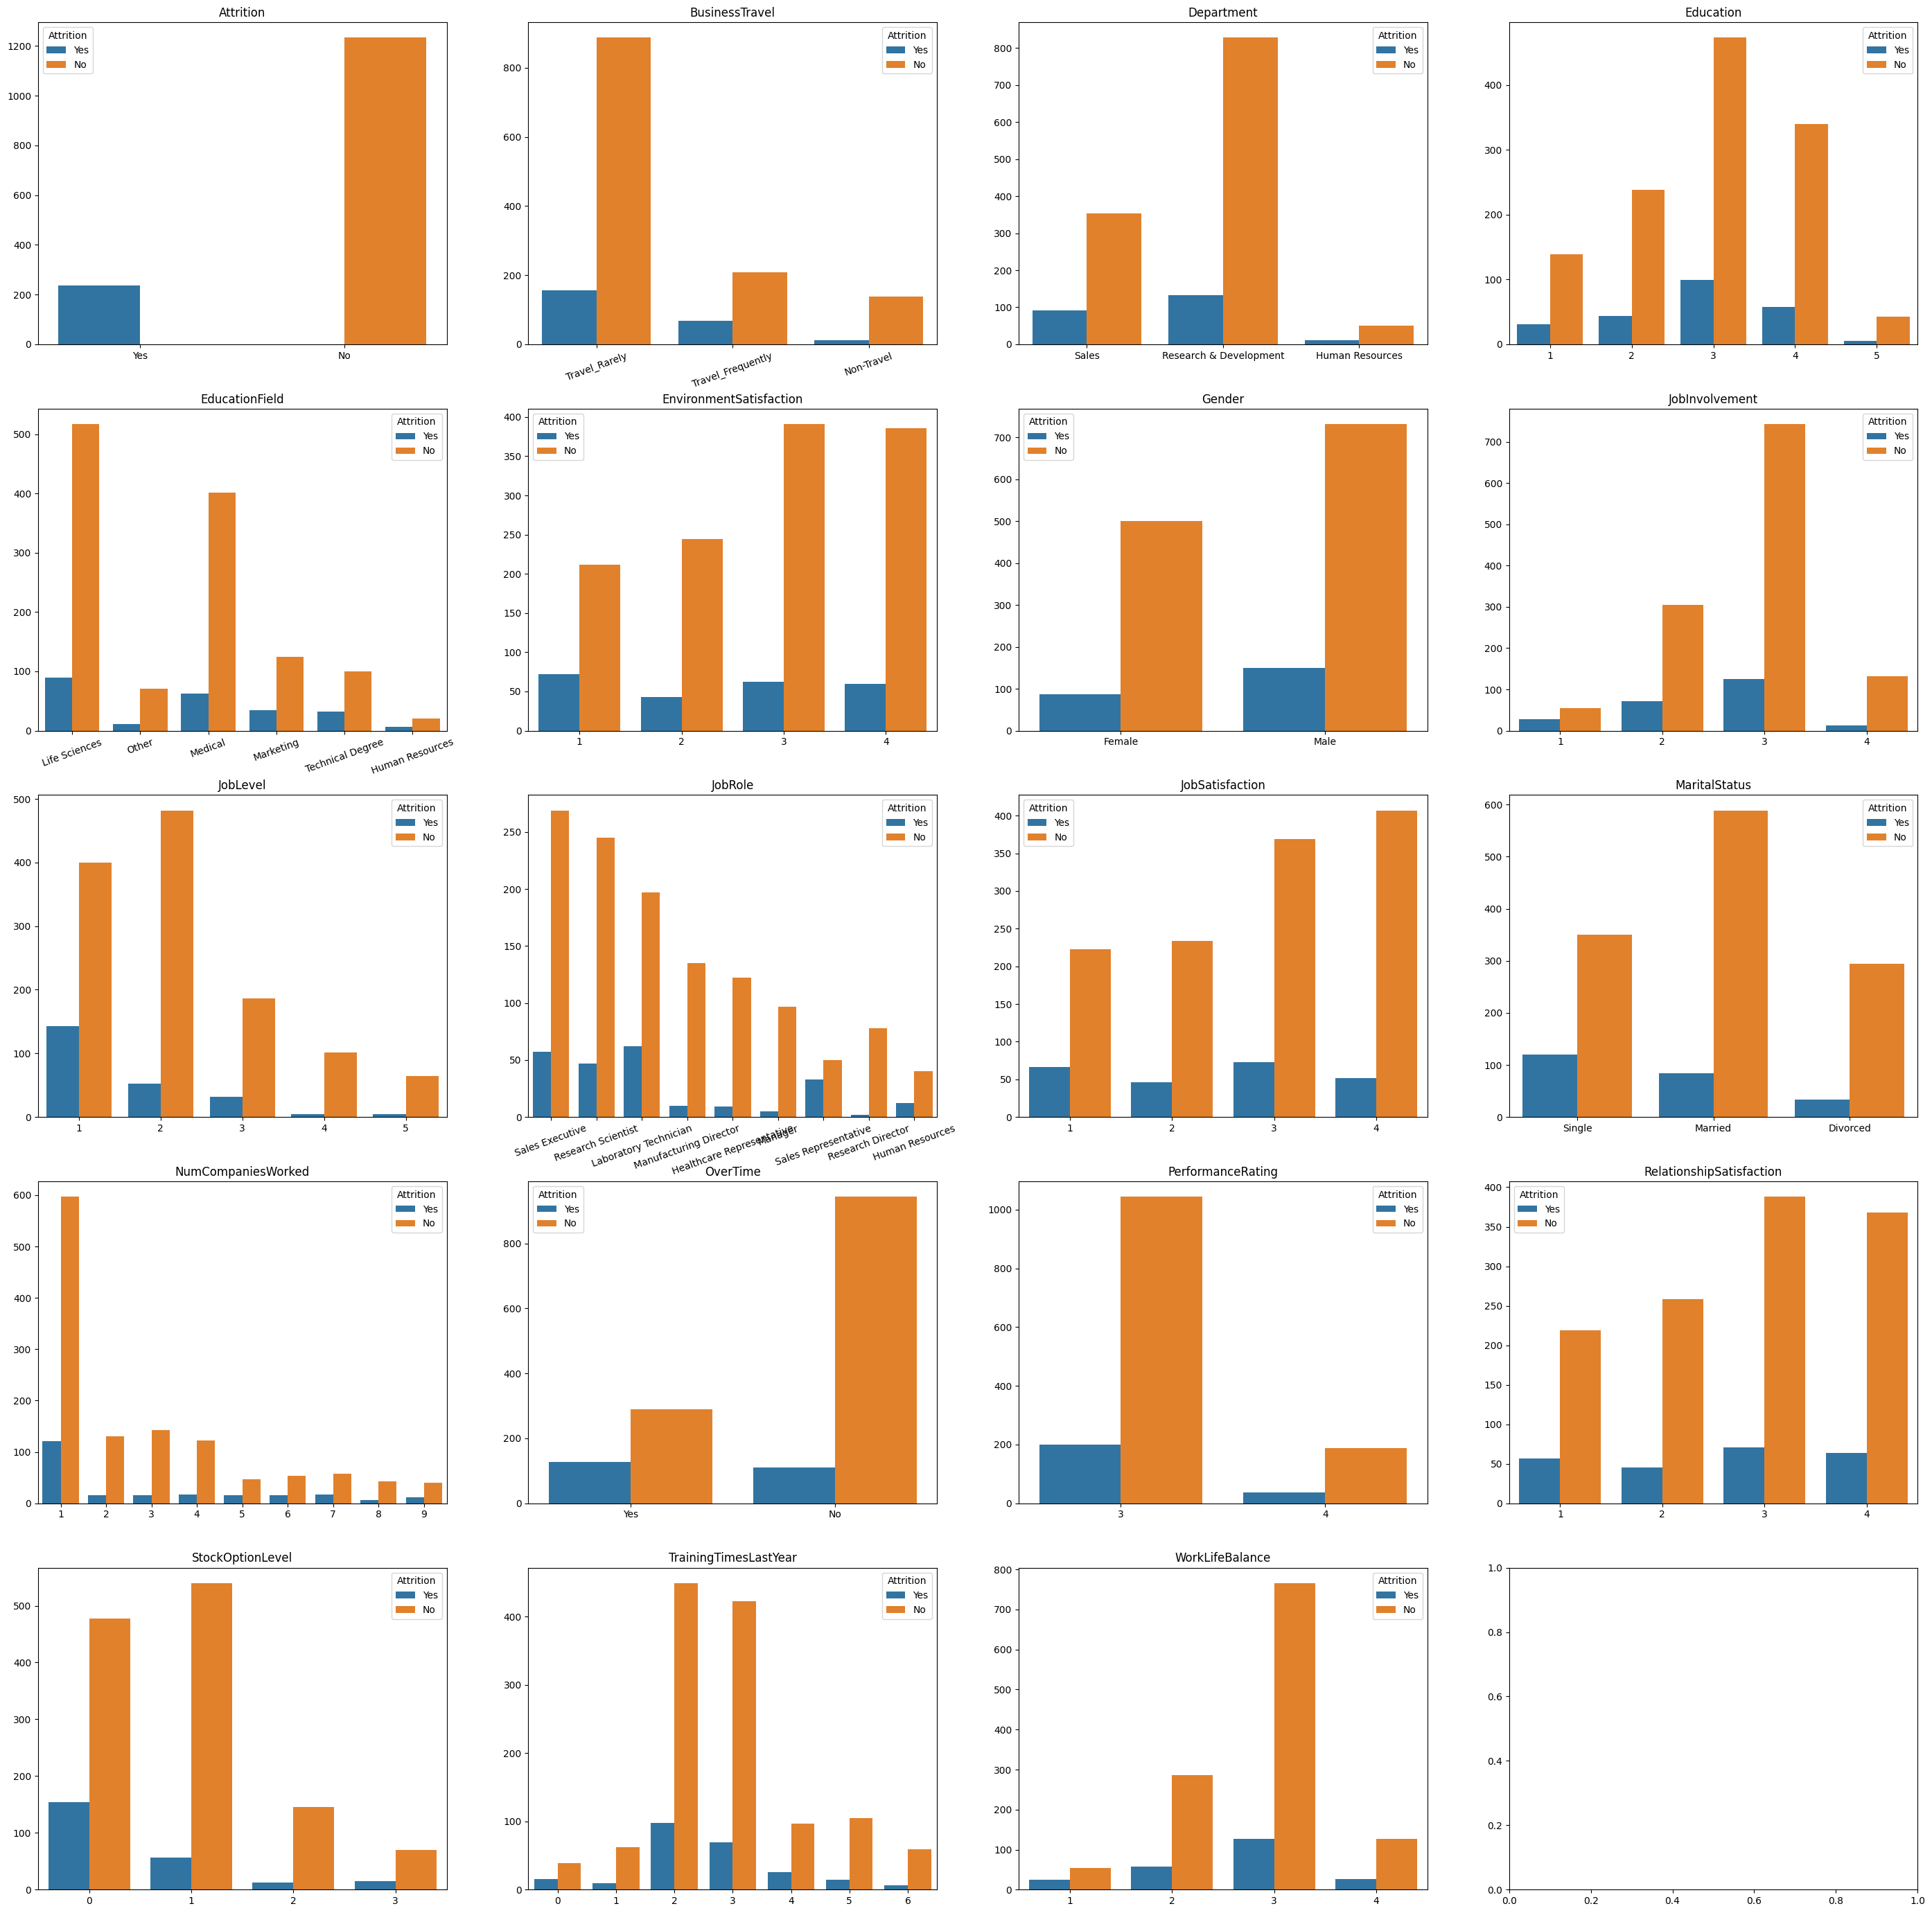

In [27]:
fig, ax = plt.subplots(5, 4, figsize=(35, 35))
ax = ax.flatten()

for i in range(len(cate_data.columns)):
    sns.countplot(x=cate_data.columns[i], data=cate_data, ax=ax[i], hue = 'Attrition').set(xlabel=None, ylabel=None)
    ax[i].set(title=cate_data.columns[i])
    
    if len(str(cate_data[cate_data.columns[i]].unique().max())) > 10:
        ax[i].tick_params(axis='x', labelrotation=20)

<h1>연속형 데이터 확인</h1>

In [25]:
cont_data = pd.DataFrame()
for col in data:
    if data[col].dtype != object and data[col].nunique() > 10:
        cont_data[col] = data[col]
        print(f'{col} : {data[col].nunique()}')

Age : 43
DailyRate : 886
DistanceFromHome : 29
EmployeeNumber : 1470
HourlyRate : 71
MonthlyIncome : 1349
MonthlyRate : 1427
PercentSalaryHike : 15
TotalWorkingYears : 40
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_336\2259583286.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cont_data[cont_data['Attrition']=='Yes'][cont_data.columns[i]],kde = True, color='r',ax=ax[i], hist = False, bins=20,label = 'Yes')
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_336\2259583286.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
h

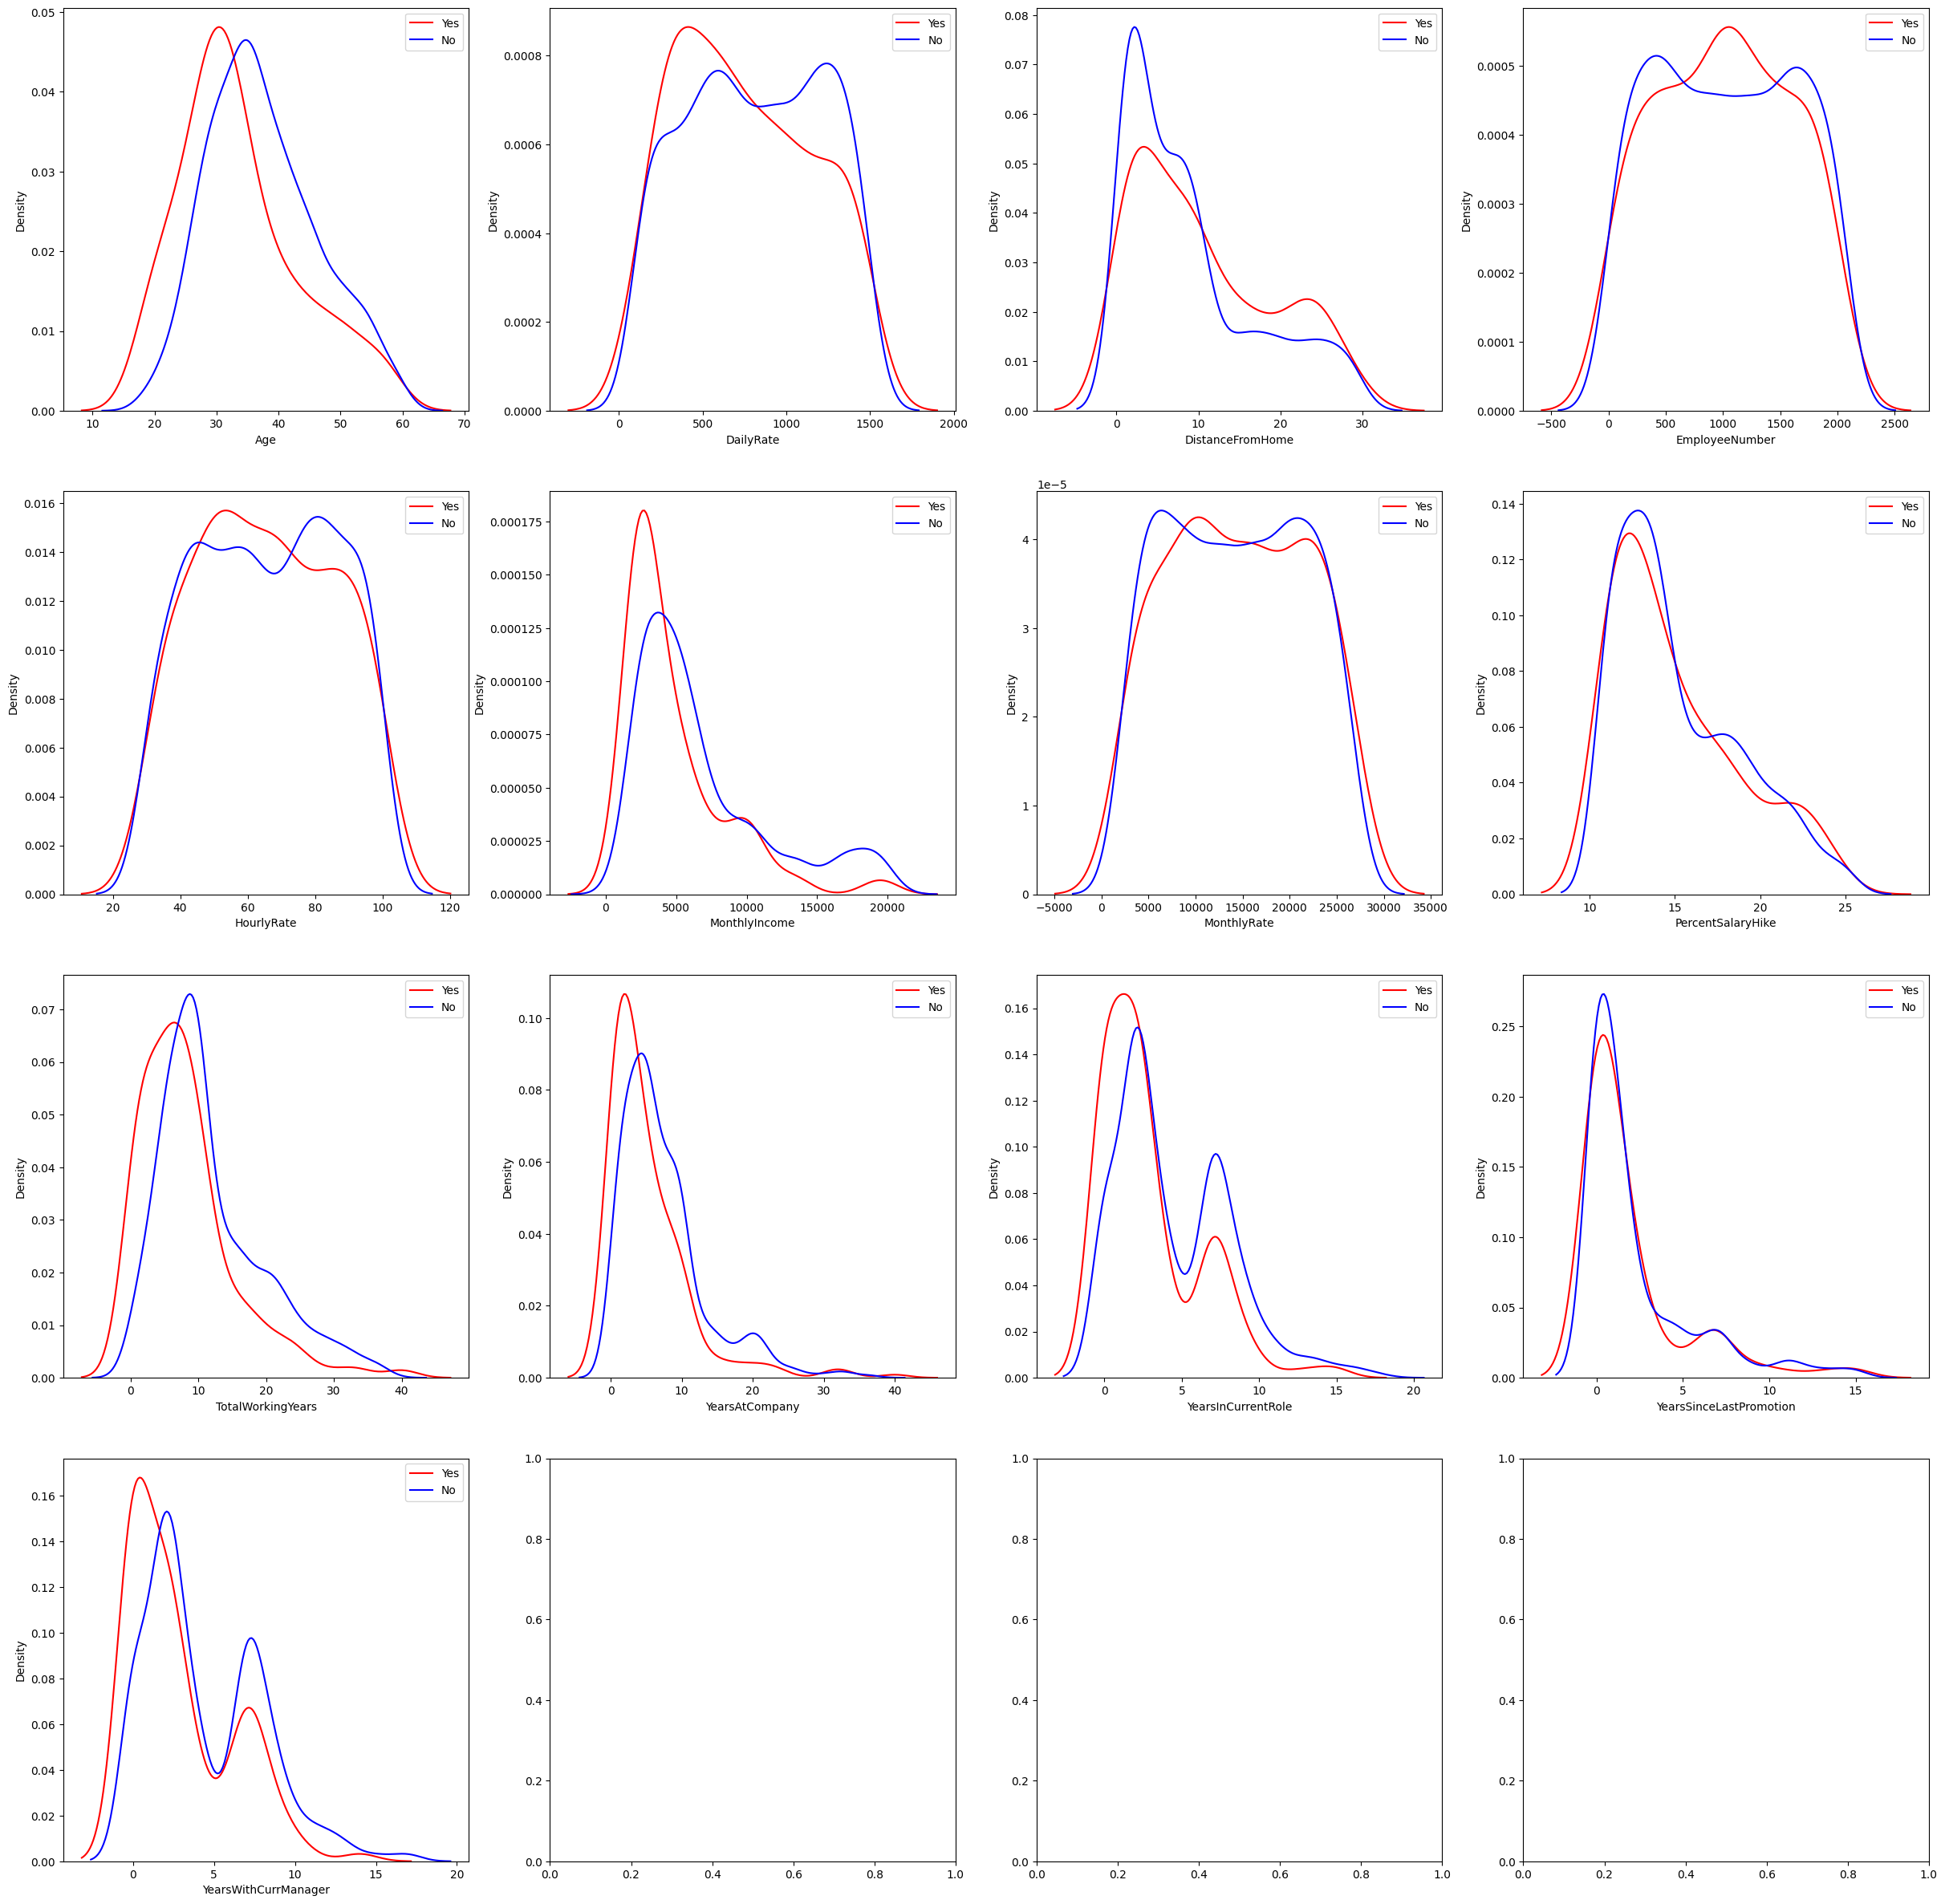

In [26]:
fig, ax = plt.subplots(4, 4, figsize=(30, 30))
ax = ax.flatten()
cont_data['Attrition'] = data['Attrition']

for i in range(len(cont_data.columns)):
    if cont_data.columns[i] != 'Attrition':
        sns.distplot(cont_data[cont_data['Attrition']=='Yes'][cont_data.columns[i]],kde = True, color='r',ax=ax[i], hist = False, bins=20,label = 'Yes')
        sns.distplot(cont_data[cont_data['Attrition']=='No'][cont_data.columns[i]], kde = True, color='b',ax=ax[i], hist = False, bins=20, label='No')
        ax[i].legend()

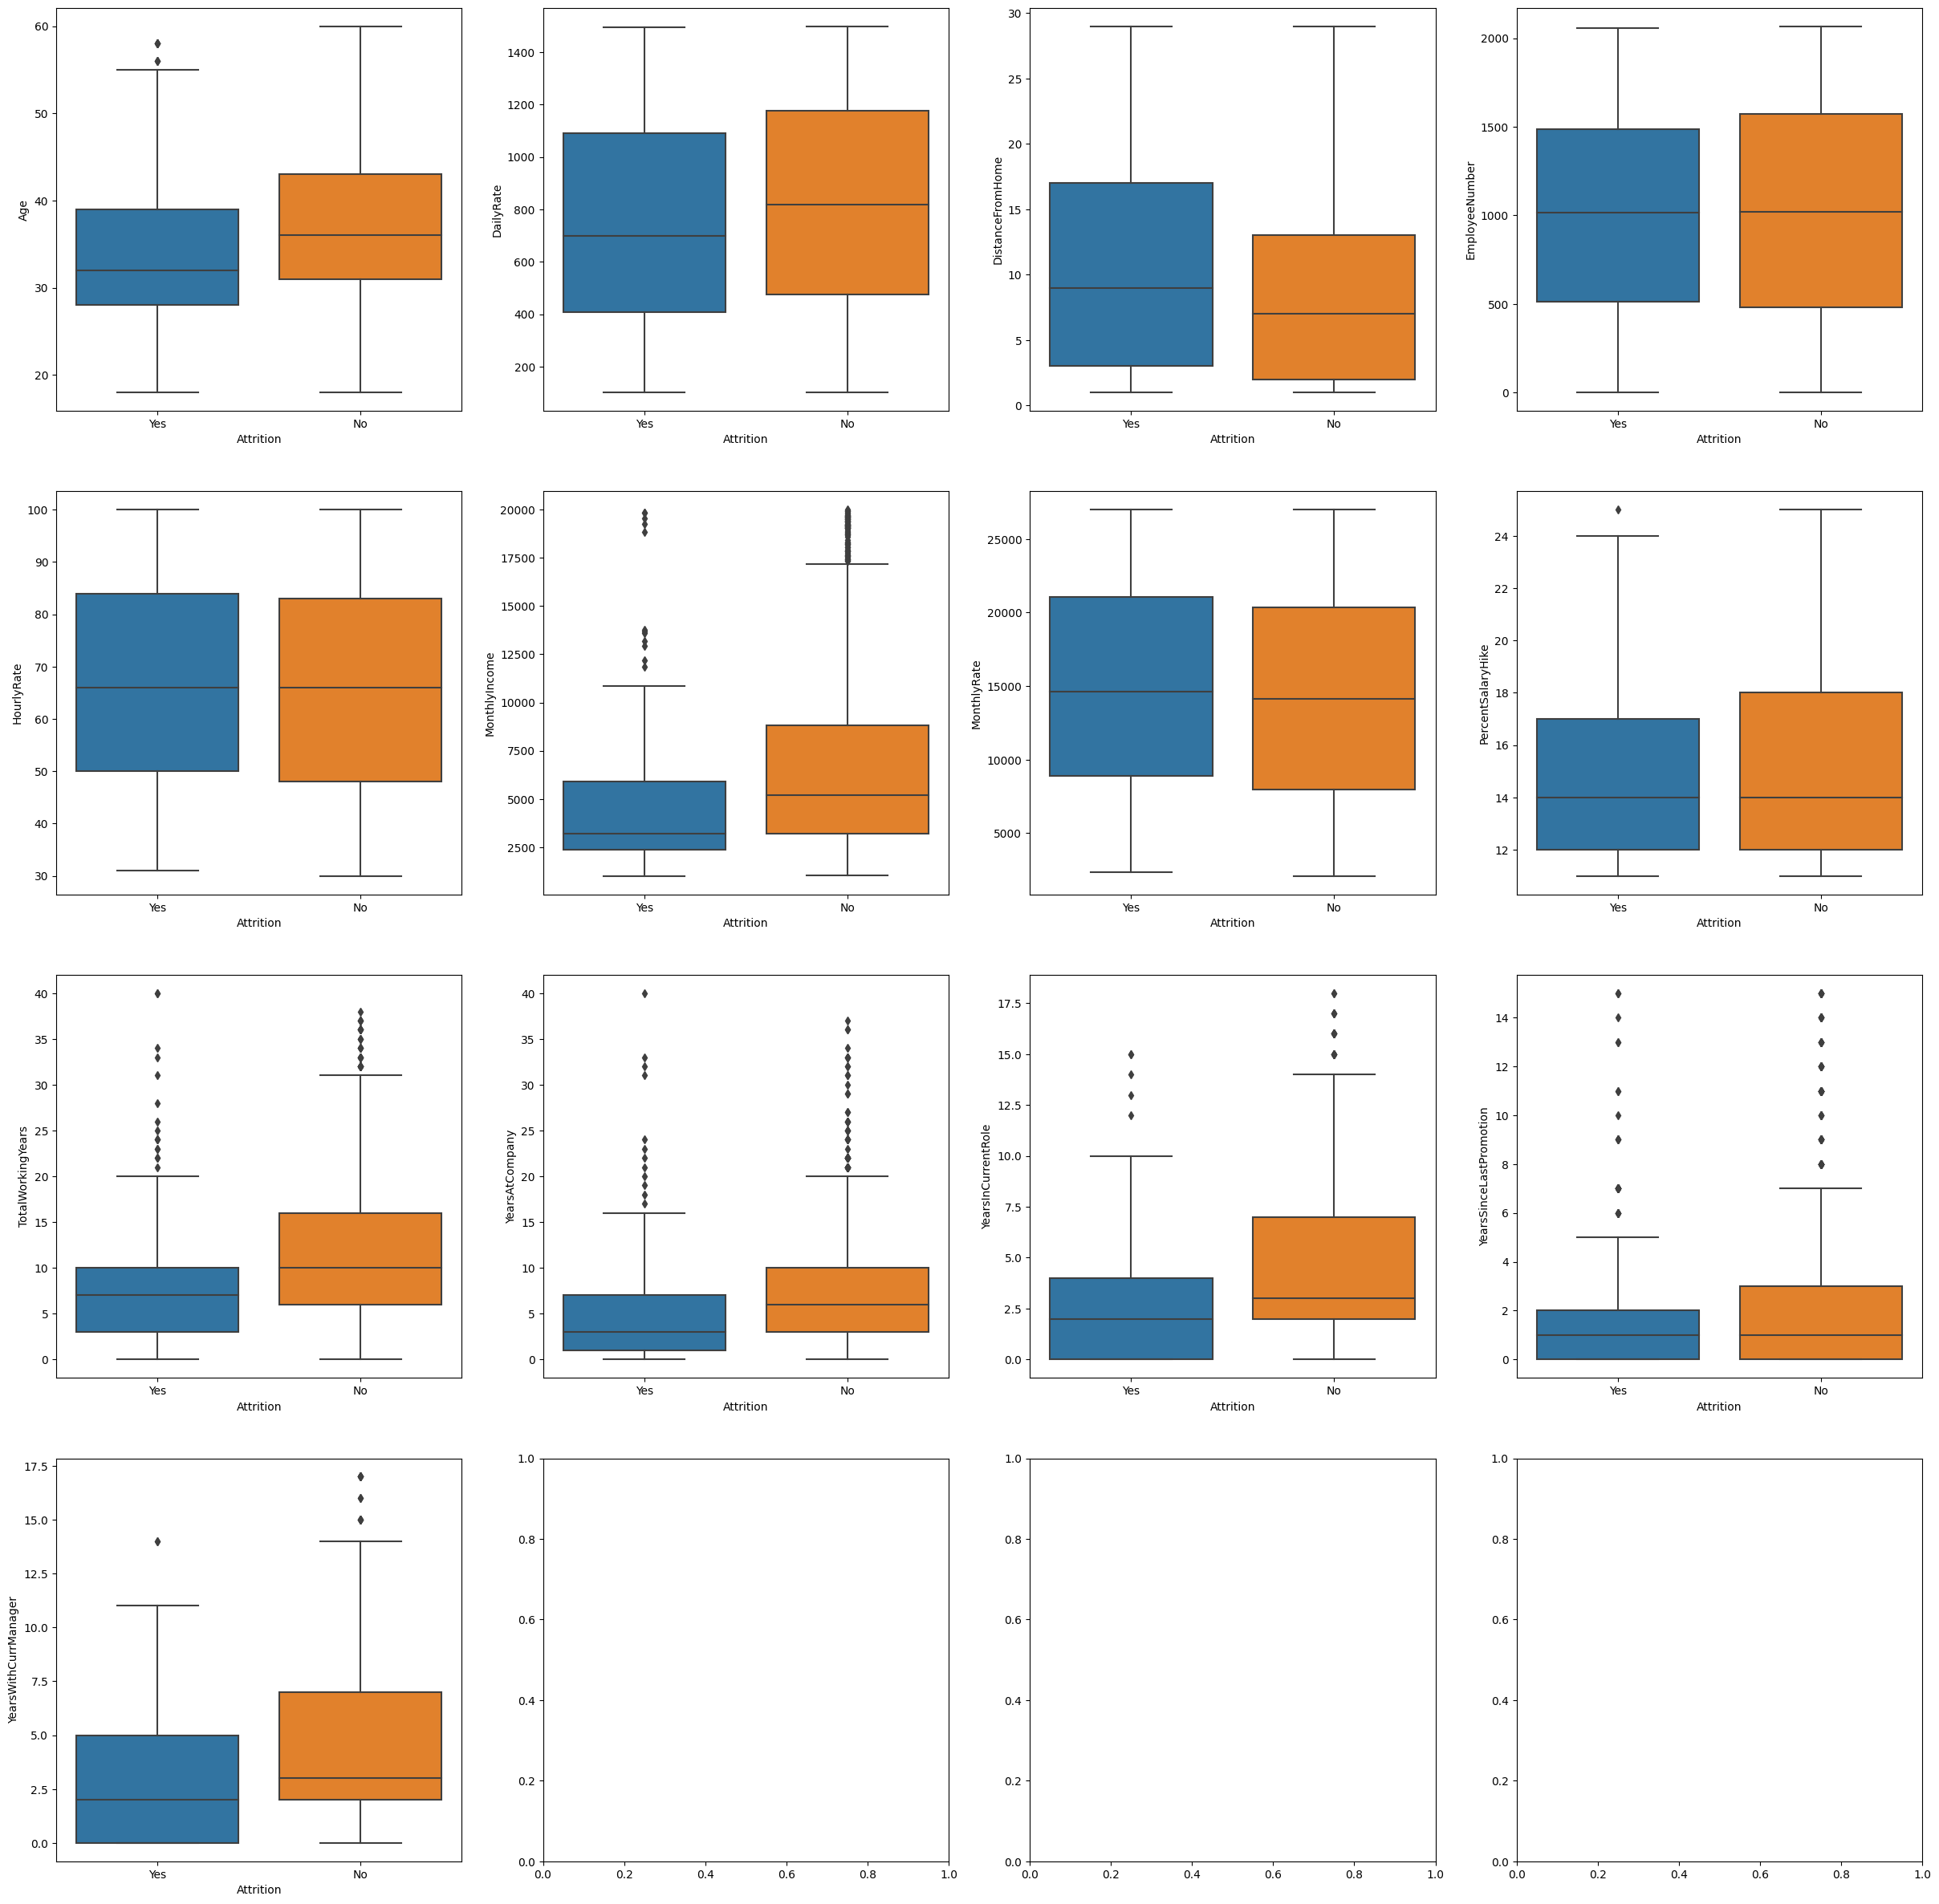

In [28]:
fig, ax = plt.subplots(4, 4, figsize=(30, 30))
ax = ax.flatten()

for i in range(len(cont_data.columns)):
    if cont_data.columns[i] != 'Attrition':
        sns.boxplot(x='Attrition', y=cont_data.columns[i], data=cont_data, ax=ax[i])